# Project: Investigate a Dataset - TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

The dataset has the following columns:
* id
* imdb_id
* popularity
* budget
* revenue
* original_title
* cast
* homepage
* director
* tagline
* keywords
* overview
* runtime
* genres
* production_companies
* release_date
* vote_count
* vote_average
* release_year
* budget_adj
* revenue_adj

You can download the dataset [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv).

### Question(s) for Analysis

In the course of this report I plan on exploring and trying to answer the following questions:
<ul>
<li><b><a href="#question1"> Research Question 1: </a></b></li>
    What are the most popular genres in the past years? 
<li><b><a href="#question2"> Research Question 2: </a></b></li>
    Do longer runtimes affect the popularity of the movie? If so what's the runtime that people like the most?
<li><b><a href="#question3"> Research Question 3: </a></b></li>
    Which production companies worked on the most movies in the past years? And which of them made the most popular movies?
</ul>

In [1]:
# importing the packages we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

Notice: after the next line of code runs you *might* have to restart the kernel and run the notebook once again (while commenting out the `!pip install` line or turning it into markdown) if there are any display issues as there's a slight bug with pandas 0.25.0 that's outside of my control.

#Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In this section we'll load our data, try to understand its general properties, and clean it up to get it ready for analysis.

### General Properties



First we'll load our data into a dataframe using pandas' `.read_csv()` method.

In [2]:
df = pd.read_csv('tmdb-movies.csv')

Now that we loaded our data let's take a look at the first row to get a general idea of what it looks like.

In [3]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


And let's also take a look at some general statistical properties of our dataset using the `.describe()` method.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can take a quick look at these properties to get a general idea of the range of the data we're working with and how it's distributed, for example if we look at the popularity stats we can see that our popularity values range from a minimum of `0.000065` to a maximum of `32.986` with a mean of `0.646` and a standard deviation of `1`.

We'll take a more in-depth look at the statistical properties of our data in the EDA section later on.

For now let's check for the shape of our dataframe using the `.shape` method.

In [5]:
df.shape

(10866, 21)

From this we can see that our dataframe has `10866` rows and `21` columns.

Let's get more info about each column with `.info()`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

It seems like there are a few missing values in some of our columns.
We'll deal with them in the data cleaning part below.


### Data Cleaning

Here we'll clean our dataset by removing duplicates, null and obselete values, and columns we have no interest in.

First let's check for duplicates and get them out of the way before we get busy.

In [7]:
df.duplicated().sum()

1

There's only one lonely duplicate in our dataset.
I'm sorry little one but we'll have to drop you with the `.drop_duplicates()` method.

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Now that the duplicate is gone let's think about which columns won't help us with our analysis and drop them too.

In [9]:
columns = ['id','imdb_id','homepage','vote_count','tagline','overview','budget','revenue','budget_adj','revenue_adj','director','keywords','cast']
df.drop(axis=1, columns=columns, inplace=True)
df.head(1)

,popularity,original_title,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015


I decided to drop the following columns as they were filled with categorical data that was unique to each movie, which wouldn't really help us in our analysis.
* id
* imdb_id
* homepage
* tagline
* overview

We'll also drop the following columns as they're not relavent to the questions we're asking.
+ budget
+ budget_adj
+ revenue
+ revenue_adj
+ keywords
+ director
+ cast
+ vote_count

We'll keep track of the shape of our dataframe as we drop more items.

Here's its new shape.

In [10]:
df.shape

(10865, 8)

Now let's check for null values in our dataset with the `.isna()` method.

In [11]:
df.isna().sum()

popularity                 0
original_title             0
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
dtype: int64

It doesn't seem like we have that many missing values after we deleted the other columns.

We can just drop these missing values with `.dropna()` as we already have enough data.

In [12]:
df.dropna(inplace=True)
df.shape

(9826, 8)

We'll use `.describe()` again to take another look at the statistical properties of our dataset.

In [13]:
df.describe()

,popularity,runtime,vote_average,release_year
count,9826.000000,9826.000000,9826.000000,9826.000000
mean,0.692013,102.674944,5.967973,2000.903216
std,1.034783,28.202856,0.914518,13.032568
min,0.000188,0.000000,1.500000,1960.000000
25%,0.230920,90.000000,5.400000,1994.000000
50%,0.417270,100.000000,6.000000,2005.000000
75%,0.773717,112.000000,6.600000,2011.000000
max,32.985763,877.000000,8.700000,2015.000000


The minimum value for runtime appears to be zero, but that doesn't really make sense so they can only be missing values.

Let's see how many we have.

In [14]:
df[df.runtime == 0].count()

popularity              13
original_title          13
runtime                 13
genres                  13
production_companies    13
release_date            13
vote_average            13
release_year            13
dtype: int64

We have `30` rows where `runtime == 0` (missing values).

Let's drop them with `.dropna()`.

In [15]:
df = df[df.runtime != 0]
df.dropna(inplace=True)
df.shape

(9813, 8)

In [16]:
df.head(1)

,popularity,original_title,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015


Our production_companies and genres columns still have their values seperated by that `|` character which would get in our way later so let's deal with it now.

We'll do this by splitting the values into lists around the `|` using the `.split('|')` method, then we'll make two copies of our dataframe one for production_companies and one for genres.

In [17]:
for col in ['genres', 'production_companies']:
    df[col] = df[col].str.split('|')
df.head()

,popularity,original_title,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,6.5,2015
1,28.419936,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/15,7.1,2015
2,13.112507,Insurgent,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",3/18/15,6.3,2015
3,11.173104,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,7.5,2015
4,9.335014,Furious 7,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",4/1/15,7.3,2015


And while we're splitting our dataframe into two we'll apply the [.explode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) method to expand  the production_companies lists to different rows.

In [18]:
prod_df = df.drop(columns='genres').explode('production_companies')
print(prod_df.shape)
prod_df.head(2)

(23192, 7)


,popularity,original_title,runtime,production_companies,release_date,vote_average,release_year
0,32.985763,Jurassic World,124,Universal Studios,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Amblin Entertainment,6/9/15,6.5,2015


We'll do the same to the genres column.

In [19]:
genres_df = df.drop(columns='production_companies').explode('genres')
print(genres_df.shape)
genres_df.head(2)

(24731, 7)


,popularity,original_title,runtime,genres,release_date,vote_average,release_year
0,32.985763,Jurassic World,124,Action,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Adventure,6/9/15,6.5,2015


And now we have two dataframes for each variable we plan on exploring ready for investigation. 

<a id='eda'></a>
## Exploratory Data Analysis

In this section I plan on exploring the three questions I posed at the start of the report.

First we'll check for outliers in our dataset by looking at a histogram of our popularity data. 

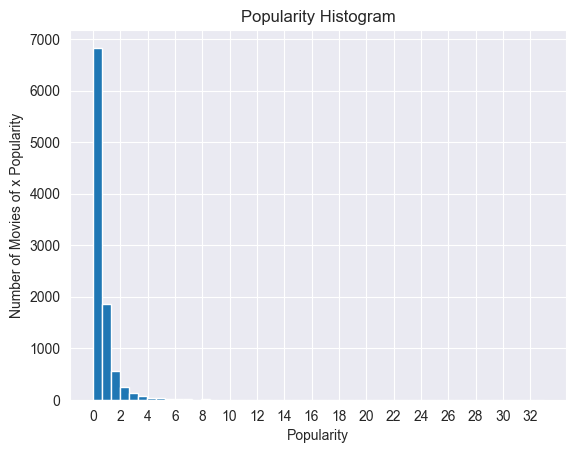

In [20]:
df.popularity.hist(bins=50)
plt.xticks(np.arange(0,33,2))
plt.title('Popularity Histogram')
plt.xlabel('Popularity')
plt.ylabel('Number of Movies of x Popularity');

Our popularity data seems very skewed to the right, with most of our values between 0 and 2, which means we have a lot of outliers in our dataset.

We won't do anything with the outliers in this case as they're a natural part of our population though.

<a id='question1'></a> 
    
### Research Question 1:

#### What are the most popular genres in the past years? 

Let's start by trying to answer our first question.

For that we'll use our `genres_df` dataframe and create visualisations relating the genres and popularity then explore the top 5 genres across the past years.

First let's take a look at the top 5 rows of our dataframe `genres_df` to keep track of what we're doing.

In [21]:
genres_df.head()

,popularity,original_title,runtime,genres,release_date,vote_average,release_year
0,32.985763,Jurassic World,124,Action,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Adventure,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Science Fiction,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Thriller,6/9/15,6.5,2015
1,28.419936,Mad Max: Fury Road,120,Action,5/13/15,7.1,2015


Now we'll create a groupby object of popularity sums for each genre sorted in ascending order.

In [22]:
pop_genres_sorted = genres_df.groupby('genres')['popularity'].sum().sort_values(ascending=True)
pop_genres_sorted.tail()

genres
Adventure    1672.195210
Thriller     2120.164483
Action       2162.552466
Comedy       2169.048695
Drama        2732.404892
Name: popularity, dtype: float64

Now we'll plot the genres by popularity on a horizontal bar chart to look for the top 5.

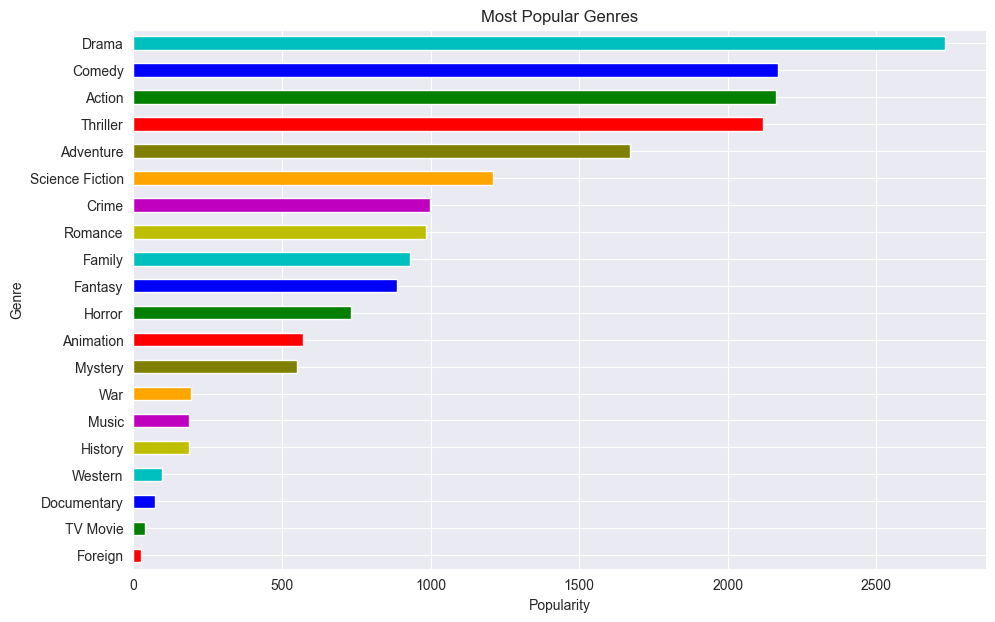

In [23]:
pop_genres_sorted.plot.barh(figsize=(11,7),color=['r','g','b','c','y','m','orange','olive'])
plt.title('Most Popular Genres')
plt.ylabel('Genre')
plt.xlabel('Popularity');

We can look at this graph to see which genres are the most and least popular.

We'll create a list of the top 5 that we can use later.

In [24]:
top5_genres = pop_genres_sorted.iloc[:14:-1].index.values
top5_genres

array(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure'], dtype=object)

Now we'll create a filtered  dataframe that only contains genres in the top 5 most popular ones.

In [25]:
top5_genre_df = genres_df.loc[genres_df['genres'].isin(top5_genres)]
top5_genre_df.head()

,popularity,original_title,runtime,genres,release_date,vote_average,release_year
0,32.985763,Jurassic World,124,Action,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Adventure,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Thriller,6/9/15,6.5,2015
1,28.419936,Mad Max: Fury Road,120,Action,5/13/15,7.1,2015
1,28.419936,Mad Max: Fury Road,120,Adventure,5/13/15,7.1,2015


And now we'll group our new `top5_genre_df` by release year and genre so it's multi-indexed groupby object with the values being the sums of the popularity for each year by genre.

In [26]:
top5_genre_group = top5_genre_df.groupby(['release_year','genres'])['popularity'].sum()
top5_genre_group.head()

release_year  genres   
1960          Action       4.725796
              Adventure    3.504904
              Comedy       3.168003
              Drama        7.361967
              Thriller     4.871460
Name: popularity, dtype: float64

Finally we're able to plot our data as lines indicating the popularity of each genre across the years thanks to pandas' [.unstack()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) and [.plot.line()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html?highlight=plot%20line#pandas.DataFrame.plot.line) methods.

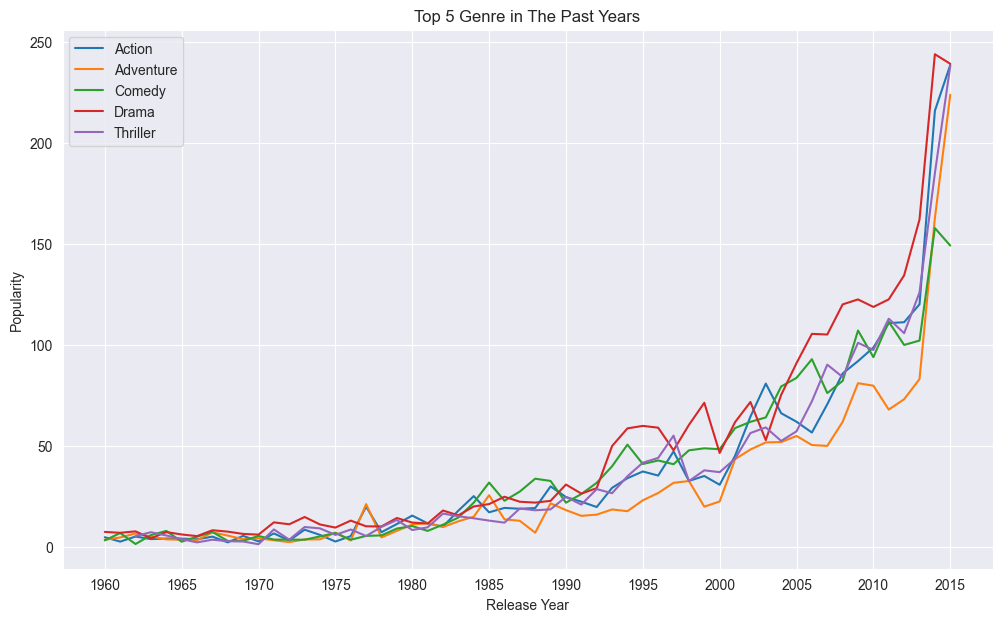

In [27]:
top5_genre_group.unstack().plot.line(figsize=(12,7))
plt.xticks(np.arange(1960,2016,5))
plt.title('Top 5 Genre in The Past Years')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.legend();

From this graph we can see that the Drama genre reigns supreme across the years apart from a small jump for the adventure genre around 1977, a similar jump for action around 2003, and a small lead for comedy in the 1984-1989 period.

We can also see that the popularity of the drama and comedy genres has gone down in 2015. While it has on the other hand gone up for action, thriller, and adventure.

<a id='question2'></a>
### Research Question 2:

#### Do longer runtimes affect the popularity of the movie? If so what's the runtime that people like the most?

To answer these questions we'll have to look at different plots of the runtime against the popularity. But first let's look at the statistical properties of the runtime column.

In [28]:
df.runtime.describe()

count    9813.000000
mean      102.810965
std        27.972648
min         2.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

The max value is pretty far away from the mean and median.

Let's look at a histogram of the runtime data to check for skewness.

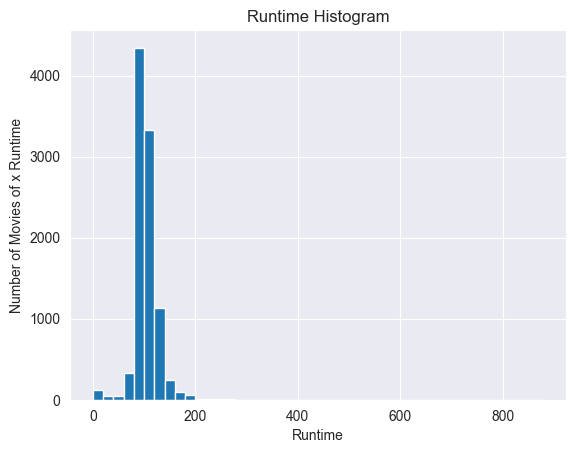

In [29]:
df.runtime.hist(bins=np.arange(0,900,20))
plt.title('Runtime Histogram')
plt.xlabel('Runtime')
plt.ylabel('Number of Movies of x Runtime');

We can see that most of the values lie mostly between 0 and 200, with most of them roughly between 60 and 160.

We can also see that it's very right skewed but we'll ignore the outliers again as they're a natural part of our dataset.

Let's plot the runtime against the popularity on a scatter plot and see what we get.

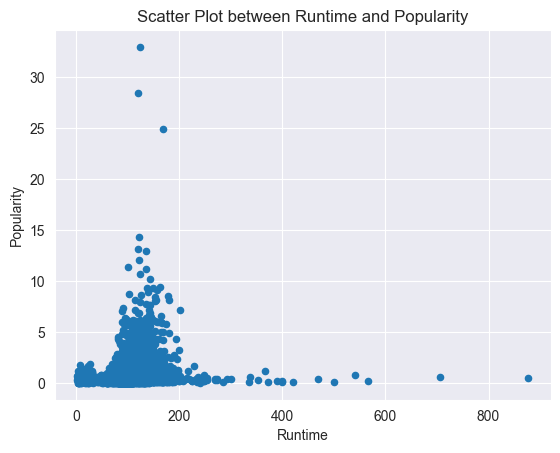

In [30]:
df.plot.scatter(x='runtime',y='popularity',)
plt.title('Scatter Plot between Runtime and Popularity')
plt.xlabel('Runtime')
plt.ylabel('Popularity');

It seems that movies with runtimes between 60 and 200 are more popular from this plot, but this could be due to there being way more movies of this runtime range so we'll have to explore this further.

To do that we'll start by creating a group of popularity sums by runtime.

In [31]:
runtime_pop = df.groupby('runtime')['popularity']
runtime_pop_sums = runtime_pop.sum().sort_values(ascending=False).iloc[14::-1]
runtime_pop_sums.head(15)

runtime
101    141.158704
92     144.106169
105    144.380080
106    144.996115
91     148.386430
102    152.700490
94     153.764307
98     153.868396
96     157.333932
108    157.612000
95     166.904296
93     172.327653
97     177.735502
90     189.511297
100    196.634027
Name: popularity, dtype: float64

We'll simply plot it now.

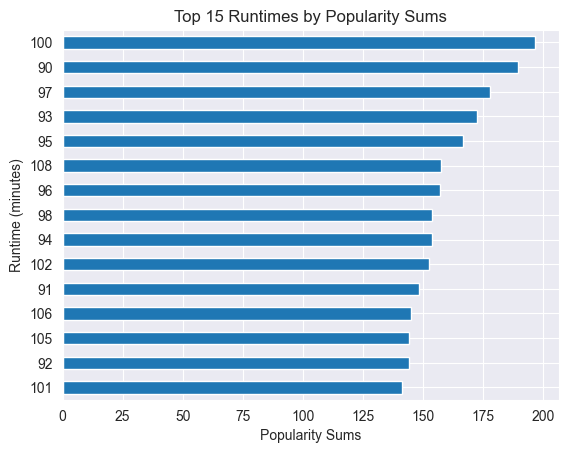

In [32]:
runtime_pop_sums.plot.barh()
plt.title('Top 15 Runtimes by Popularity Sums')
plt.xlabel('Popularity Sums')
plt.ylabel('Runtime (minutes)');

From this we can see that movies in the 90-100 minute range seem to be doing the best in terms of popularity though this again could be attributed to this range having more entries so we'll do this one final time but with means instead.

In [33]:
runtime_pop_means = runtime_pop.mean().sort_values(ascending=False).iloc[14::-1]
runtime_pop_means.head(15)

runtime
148    2.029306
178    2.052984
142    2.133193
143    2.187004
152    2.413035
136    2.465391
161    2.520879
156    2.618783
162    2.708137
179    2.897817
165    2.970531
200    3.264571
201    3.687482
194    4.355219
169    7.279679
Name: popularity, dtype: float64

We'll plot the top runtimes by popularity means and see we the results are any different.

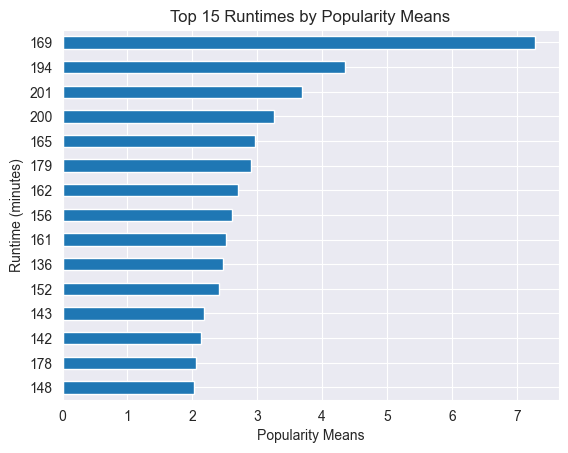

In [34]:
runtime_pop_means.plot.barh()
plt.title('Top 15 Runtimes by Popularity Means')
plt.xlabel('Popularity Means')
plt.ylabel('Runtime (minutes)');

It seems that movies with a runtime of 169 are unrivalled when it comes to popularity, let's take a look at these movies and their count to see if we can draw any useful conclusions from that.

In [35]:
df.query('runtime == 169')

,popularity,original_title,runtime,genres,production_companies,release_date,vote_average,release_year
629,24.949134,Interstellar,169,"[Adventure, Drama, Science Fiction]","[Paramount Pictures, Legendary Pictures, Warne...",11/5/14,8.0,2014
4367,4.218933,The Hobbit: An Unexpected Journey,169,"[Adventure, Fantasy, Action]","[WingNut Films, New Line Cinema, Metro-Goldwyn...",11/26/12,6.9,2012
6916,0.094800,10.5: Apocalypse,169,"[Drama, Thriller]",[Hallmark Entertainment],3/18/06,4.6,2006
7387,4.965391,Pirates of the Caribbean: At World's End,169,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...",5/19/07,6.8,2007
8974,2.170136,Saving Private Ryan,169,"[Drama, History, War]","[Paramount Pictures, DreamWorks SKG, Amblin En...",7/24/98,7.7,1998


The extremely high popularity mean apparently is due to their number being so few and them having Interstellar among them which has an extremely high popularity rating.

Let's explore this further by looking at the next most popular runtime which is 194 mins.

In [36]:
df.query('runtime == 194')

,popularity,original_title,runtime,genres,production_companies,release_date,vote_average,release_year
5231,4.355219,Titanic,194,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",11/18/97,7.3,1997


Hmm... only one movie with a relatively high popularity rating.

I think we can conclude here that there's a slight correlation between popularity and runtimes which tells us that people don't really like very long or very short movies, though, it's hard to see if there's a favourite runtime by the means we used and further exploration is necessary to arrive at an answer for that. 

<a id='question3'></a>
### Research Question 3:

#### Which production companies worked on the most movies? And which of them made the most popular movies?

Let's start with the first half of the question.

To answer that we'll need a simple bar chart plotting the production companies aganist their produced original titles count.

We'll use our production companies subset `prod_df`.
Let's refresh our memory with another look at it.

In [37]:
prod_df.head()

,popularity,original_title,runtime,production_companies,release_date,vote_average,release_year
0,32.985763,Jurassic World,124,Universal Studios,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Amblin Entertainment,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Legendary Pictures,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Fuji Television Network,6/9/15,6.5,2015
0,32.985763,Jurassic World,124,Dentsu,6/9/15,6.5,2015


First we'll create a group of production companies sorted by their produced original title count.

We'll use the [.nunique()]() method which is similar to count but only counts unique values.

In [38]:
prod_sorted_counts = prod_df.groupby('production_companies')['original_title'].nunique().sort_values(ascending=False)
prod_sorted_counts.head(10)

production_companies
Universal Pictures                        520
Warner Bros.                              508
Paramount Pictures                        428
Twentieth Century Fox Film Corporation    277
Columbia Pictures                         271
New Line Cinema                           217
Metro-Goldwyn-Mayer (MGM)                 216
Walt Disney Pictures                      210
Touchstone Pictures                       178
Columbia Pictures Corporation             160
Name: original_title, dtype: int64

Then we'll simply plot the top 10 companies with the most produced movies on a horizontal bar chart as follows. 

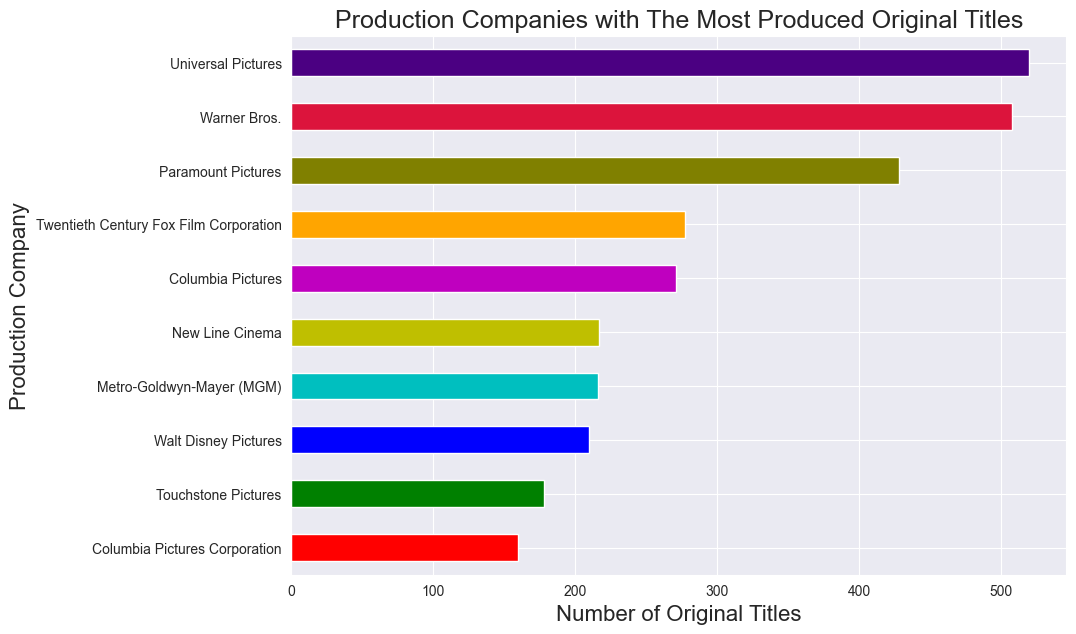

In [39]:
prod_sorted_counts.iloc[9::-1].plot.barh(figsize=(10,7),color=['r','g','b','c','y','m','orange','olive','crimson','indigo'])
plt.title('Production Companies with The Most Produced Original Titles',fontsize=18)
plt.xlabel('Number of Original Titles',fontsize=16)
plt.ylabel('Production Company',fontsize=16);

From this we can see that Universal Pictures comes in first place with 522 original titles and Warner Bros. second with 509 titles.

Now onto the second half of the question. We'll do something similar to what we did for the genres.
We'll group our data by production company then take the sum of the popularity of all movies for each company, sort it in ascending order, and take the last 10 companies, which would be our top ten.

* *I didn't sort it in descending order and take the top 10 because that would cause problems with the plot below*

In [40]:
pop_prod_group = prod_df.groupby('production_companies')['popularity'].sum().sort_values(ascending=True).iloc[-10:]
pop_prod_group.head(10)

production_companies
Legendary Pictures                        154.757805
Village Roadshow Pictures                 156.035831
Metro-Goldwyn-Mayer (MGM)                 180.300491
New Line Cinema                           240.243331
Columbia Pictures                         285.189093
Walt Disney Pictures                      295.706429
Twentieth Century Fox Film Corporation    345.733103
Paramount Pictures                        418.167801
Universal Pictures                        499.892618
Warner Bros.                              590.824364
Name: popularity, dtype: float64

Finally we'll plot the companies against the sum of the popularity of their produced movies.

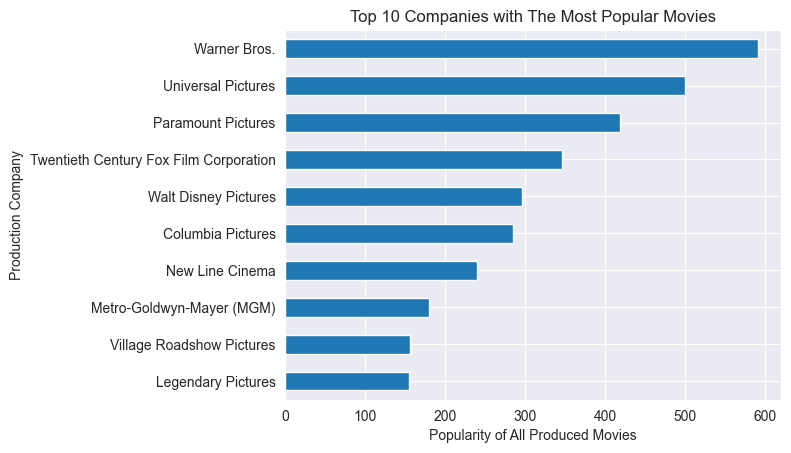

In [41]:
pop_prod_group.plot.barh()
plt.title('Top 10 Companies with The Most Popular Movies')
plt.xlabel('Popularity of All Produced Movies')
plt.ylabel('Production Company');

And done!

It's no surprise to see Warner Bros. and Universal Pictures here as they produced the most movies overall but what's surprising is that their order is flipped, which means that even though UP produced about 10 movies more than WB, WB's total movie popularity exceeded UP's by around 90. Other than that there's only some variation between the two graphs towards the bottom of the dataset.

<a id='conclusions'></a>
## Conclusions

### Summary

In the course of this report we have managed to partially answer the questions we set out asking and we learnt many things about our data which I'll summarize below.
+ First we explored the popularity of genres across the years and found out that drama was the most popular for the longest time apart from small time windows where it was overtaken by adventure, action, and comedy in 1977, 2003, and 1984-1989 respectively. Further investigation could be done here using inferential statistics and machine learning to predict what changes could happen to the genres in the following years.

+ Then we looked at relations between runtime and popularity to see what runtime range was more popular which we found out was around 60-200 minutes though more rigorous statistical tests might be necessary to determine an actual favourite runtime as the range we arrived at makes up a major part of our population.

+  Finally we looked at the production companies that produced the most movies and which ones produced the ones with the highest popularity, though, it was a brief exploration and I didn't take the time exploring it from many angles so the answers were somewhat shallow for the second half of the question yet a little satisfactory for the first as we found out the top 10 production companies in terms of number of produced movies.

### Limitations

Some of the limitations on this analysis were in the runtime exploration, where I believe it would've been better to group them into intervals and explore popularity against the runtime intervals, as well as the conclusion we arrived at which might've still been due to the range of 60-200 mins having more entries. 

Another limitation would be that we based our questions and answers on popularity and didn't look for correlation with other variables to see for example top genres or production companies by vote averages or revenue.

## Refrences

I mostly used the following websites to find solutions to some of the problems that faced me trying to finish this project.
+ [Geeks For Geeks](https://www.geeksforgeeks.org/)
+ [Stack Overflow](https://stackoverflow.com/)
+ [Official Pandas Documentation](https://pandas.pydata.org/docs/)

I have also referred to this book for some problems:
+ Data Science From Scratch by Joel Grus
